This notebook looks at running DMD using the [modred](https://pypi.python.org/pypi/modred)  on the bubbles videos.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import modred as mr

In [14]:
from skimage import io

In [15]:
path = '../Test1/'

In [16]:
# read the videos into a collection
video = io.imread_collection(path+'*.tif')

In [17]:
len(video)

5477

In [34]:
T = 100 # decide how many images to read (On a small machine big T this may overload your RAM!!! Tested on EC2 instance with 16GB RAM)

In [35]:
short_video = np.array(video[:T])

In [36]:
# reshape in # features x # samples
data = short_video.reshape(T,800*1280).T

In [37]:
# data = [frame.reshape(800*1280) for frame in video[:10]]

In [38]:
data.shape

(1024000, 100)

In [39]:
# DMDHandles is the approach which can work with any type of vectors and inner product, but too involved for simple arrays
# DMD = mr.DMDHandles(mr.InnerProductBlock(100))
# DMD_eigvals, correlation_mat_eigvals = DMD.compute_decomp(data)[0, 3]

We will use the `modred.compute _DMD_matrices_snaps_method` which can work on numpy arrays:

In [40]:
help(mr.compute_DMD_matrices_snaps_method)

Help on function compute_DMD_matrices_snaps_method in module modred.dmd:

compute_DMD_matrices_snaps_method(vecs, mode_indices, adv_vecs=None, inner_product_weights=None, atol=1e-13, rtol=None, max_num_eigvals=None, return_all=False)
    Computes DMD modes using data stored in matrices, using method of
    snapshots.
    
    Args:
        ``vecs``: Matrix whose columns are data vectors.
    
        ``mode_indices``: List of indices describing which modes to compute.
        Examples are ``range(10)`` or ``[3, 0, 6, 8]``. 
    
    Kwargs:
        ``adv_vecs``: Matrix whose columns are data vectors advanced in time.
        If not provided, then it is assumed that the vectors describe a
        sequential time-series. Thus ``vecs`` becomes ``vecs[:, :-1]`` and
        ``adv_vecs`` becomes ``vecs[:, 1:]``.
    
        ``inner_product_weights``: 1D array or matrix of inner product weights.
        Corresponds to :math:`W` in inner product :math:`v_1^* W v_2`.
        
        ``atol``:

We need to specify the numbers of the modes as a second parameter.

In [42]:
%%time
exact_modes, proj_modes, spectral_coeffs, eigvals  = mr.compute_DMD_matrices_snaps_method(data.astype('float'),list(range(5)))

CPU times: user 4.15 s, sys: 948 ms, total: 5.1 s
Wall time: 1.81 s


In [43]:
print(exact_modes.shape)
print(proj_modes.shape)

(1024000, 5)
(1024000, 5)


In [44]:
eigvals # not ordered?

array([   93309.40727822,    93309.40727822,    59153.44086083,
          59153.44086083,    44949.13914952,    44949.13914952,
        1787381.22065503,  2340371.88194762,    49112.58981852,
          49112.58981852,    60461.82163778,    60461.82163778,
          47971.41754166,    47971.41754166,    49422.33234624,
          49422.33234624,    48216.94812226,    48216.94812226,
          67543.1889906 ,    67543.1889906 ,   101609.99908917,
         101609.99908917,   163475.46643089,   163475.46643089,
         194575.32155454,   194575.32155454,   104360.57668758,
         104360.57668758,  2266431.69887488,  2266431.69887488,
         143903.49234637,   143903.49234637,    80648.30930227,
          80648.30930227,    80073.37428521,    80073.37428521,
          89046.09451216,    89046.09451216,   196506.03282707,
         196506.03282707,   142986.737107  ,   142986.737107  ,
         106759.49508849,   106759.49508849,    70976.93351503,
          70976.93351503,    39423.79270

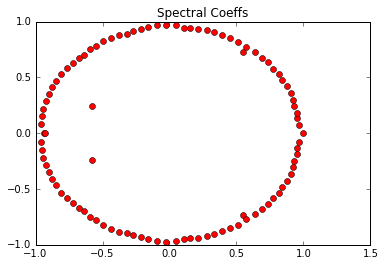

In [45]:
plt.plot(np.real(spectral_coeffs),np.imag(spectral_coeffs),'ro')
plt.title('Spectral Coeffs')

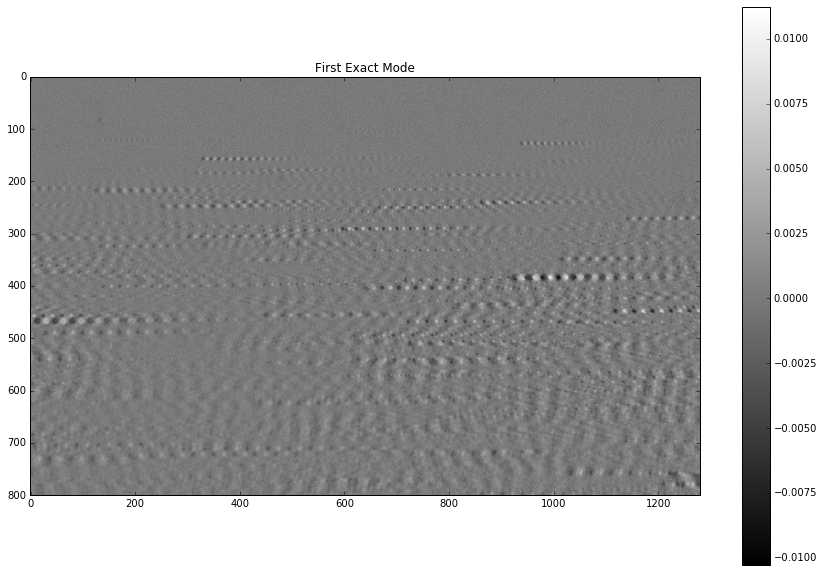

In [47]:
plt.figure(figsize = (15,10))
plt.imshow(np.array(np.real(exact_modes)[:,0]).reshape((800,1280)),cmap = 'gray')
plt.title('First Exact Mode')
plt.colorbar()

In [ ]:
#### Extra toy examples for testing

In [35]:
# POD toy example

num_vecs = 30
# Arbitrary data
vecs = np.random.random((100, num_vecs))
num_modes = 5
modes, eig_vals = mr.compute_POD_matrices_snaps_method(
    vecs, list(range(num_modes)))

In [36]:
# DMD toy example

num_vecs = 10
# Arbitrary data
vecs = np.random.random((1024000, num_vecs))
num_modes = 5
res = mr.compute_DMD_matrices_snaps_method(
    vecs, list(range(num_modes)))